In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv")
df

,Batch Number,Plant Date,Class,Fresh_weight,Head_weight,Radia_Diameter,Polar_diameter,diameter_ratio,no_of_days,Density,Leaf_area,Square_ID,Check_Date,Day_to_check,Humidity,Temperature
0,402,4/11/2020,4,696,282,122,95,1.284211,35,0.380897,480,529,6/4/2020,5/16/2020,64.24,14.75
1,402,4/11/2020,4,604,267,115,100,1.150000,35,0.385582,462,529,6/4/2020,5/16/2020,64.24,14.75
2,402,4/11/2020,4,689,320,128,108,1.185185,35,0.345388,485,529,6/4/2020,5/16/2020,64.24,14.75
3,402,4/11/2020,3,596,289,120,100,1.200000,35,0.383298,453,529,6/4/2020,5/16/2020,64.24,14.75
4,402,4/11/2020,5,636,294,124,96,1.291667,35,0.380394,431,529,6/4/2020,5/16/2020,64.24,14.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,589,6/29/2020,4,169,2,20,25,0.800000,10,0.381972,153,578,7/31/2020,7/7/2020,70.70,14.85
468,589,6/29/2020,2,40,1,10,10,1.000000,10,1.909859,107,578,7/31/2020,7/7/2020,70.70,14.85
469,589,6/29/2020,3,142,2,20,25,0.800000,10,0.381972,161,578,7/31/2020,7/7/2020,70.70,14.85
470,589,6/29/2020,3,83,1,15,15,1.000000,10,0.565884,93,578,7/31/2020,7/7/2020,70.70,14.85


In [3]:
df.describe()

,Batch Number,Class,Fresh_weight,Head_weight,Radia_Diameter,Polar_diameter,diameter_ratio,no_of_days,Density,Leaf_area,Square_ID,Humidity,Temperature
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,516.527542,3.078390,561.824153,177.548729,103.766949,99.631356,1.081926,17.586864,0.255443,453.493644,786.832627,79.011695,12.286271
std,61.583865,1.475993,269.129249,157.367535,39.558507,34.203769,0.793085,7.767377,0.200520,182.035262,570.624863,8.037686,2.582699
min,402.000000,1.000000,40.000000,1.000000,10.000000,10.000000,0.434783,7.000000,0.083339,93.000000,6.000000,64.240000,8.820000
25%,510.000000,2.000000,330.000000,39.000000,70.000000,75.000000,0.933333,10.000000,0.171334,300.750000,450.000000,70.700000,10.550000
50%,517.000000,3.000000,523.000000,126.500000,110.000000,100.000000,1.013514,17.000000,0.210881,450.000000,578.000000,80.760000,10.910000
75%,589.000000,4.000000,795.000000,296.250000,138.000000,130.000000,1.125000,19.000000,0.290481,597.000000,1132.000000,84.330000,14.850000
max,598.000000,5.000000,1280.000000,665.000000,185.000000,178.000000,12.666667,35.000000,2.252583,986.000000,2019.000000,92.300000,16.500000


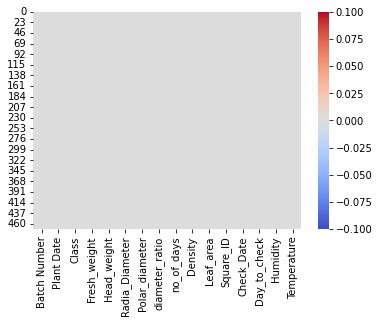

In [4]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

In [5]:
y=df[['Head_weight','Polar_diameter','Radia_Diameter']]
X=df[['Fresh_weight','Temperature','Humidity','Leaf_area','Density','no_of_days','Class']]

<AxesSubplot:>

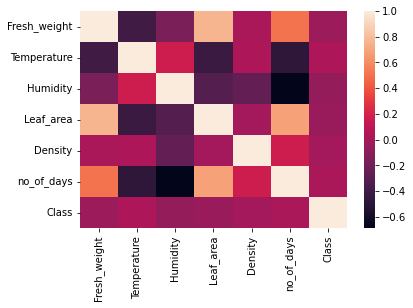

In [6]:
sns.heatmap(X.corr())

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
max_depth=max_depth,
random_state=0))
regr_multirf.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=0))

In [17]:
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
random_state=2)
regr_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=30, random_state=2)

In [18]:
y_multirf = regr_multirf.predict(X_test_scaled)
y_rf = regr_rf.predict(X_test_scaled)

In [19]:
print(y_multirf)

[[102.53 103.37 101.34]
 [294.74 134.88 141.21]
 [146.97  89.43 108.28]
 [ 26.12  62.23  61.41]
 [136.14 117.83 127.03]
 [ 92.17 121.2  104.25]
 [ 61.1   98.07  81.45]
 [212.67 130.89 128.64]
 [103.98 111.43  97.49]
 [ 53.21  83.22  79.68]
 [124.73 104.47 120.39]
 [124.39 115.62 105.32]
 [ 33.07  67.98  67.  ]
 [324.37 141.9  151.58]
 [216.75 141.93 143.17]
 [351.73  97.91 126.22]
 [371.72 151.7  154.65]
 [ 89.7   84.68  83.05]
 [ 77.26  76.63  70.15]
 [ 57.44  82.17  79.45]
 [463.27 149.38 173.86]
 [ 88.05  65.91  56.53]
 [305.29 144.6  151.91]
 [258.47  96.44 120.72]
 [327.02 144.4  149.46]
 [  5.18  42.63  40.7 ]
 [ 68.    78.8   80.88]
 [437.77 150.4  148.24]
 [ 26.41  61.9   59.49]
 [260.87 100.53 118.52]
 [100.71 102.8  107.39]
 [ 25.83  65.55  57.36]
 [ 33.81  71.41  67.45]
 [235.46 136.5  139.24]
 [280.23 111.95 134.85]
 [372.8   52.94 149.93]
 [458.05 148.29 161.24]
 [ 45.38  76.33  66.79]
 [ 39.29  77.88  72.76]
 [377.8  100.22 127.72]
 [239.7  125.79 125.73]
 [280.03 102.78 

In [20]:
print(y_rf)

[[ 92.44  96.09  94.51]
 [294.88 133.02 140.4 ]
 [167.07  91.46 106.69]
 [ 24.57  61.96  60.71]
 [138.76 122.53 122.07]
 [ 86.86 119.72 101.26]
 [ 62.08  83.95  72.16]
 [220.69 130.78 129.69]
 [124.16 112.17 110.97]
 [ 57.33  80.95  80.61]
 [128.79 105.56 110.68]
 [130.79 115.77 114.89]
 [ 31.24  68.59  67.1 ]
 [329.02 141.7  152.42]
 [220.76 140.4  145.46]
 [349.46  96.71 128.28]
 [375.35 149.65 158.4 ]
 [ 94.11  84.    83.99]
 [ 89.53  73.72  74.35]
 [ 57.87  81.56  78.7 ]
 [463.38 149.13 169.39]
 [ 78.8   74.49  69.91]
 [297.04 139.64 144.98]
 [261.27  99.29 116.52]
 [315.6  143.06 146.29]
 [ 11.65  44.19  39.05]
 [ 72.19  79.1   79.7 ]
 [408.47 144.18 153.56]
 [ 27.19  61.4   58.3 ]
 [256.17 102.7  120.57]
 [114.37 104.84 109.07]
 [ 23.82  61.47  57.57]
 [ 34.43  69.66  66.48]
 [237.51 138.75 141.01]
 [256.11 120.41 132.91]
 [371.72  63.36 140.53]
 [473.26 152.09 161.05]
 [ 44.53  74.28  67.42]
 [ 36.82  72.17  65.99]
 [373.04  99.94 129.15]
 [246.25 124.98 128.18]
 [270.17 111.38 